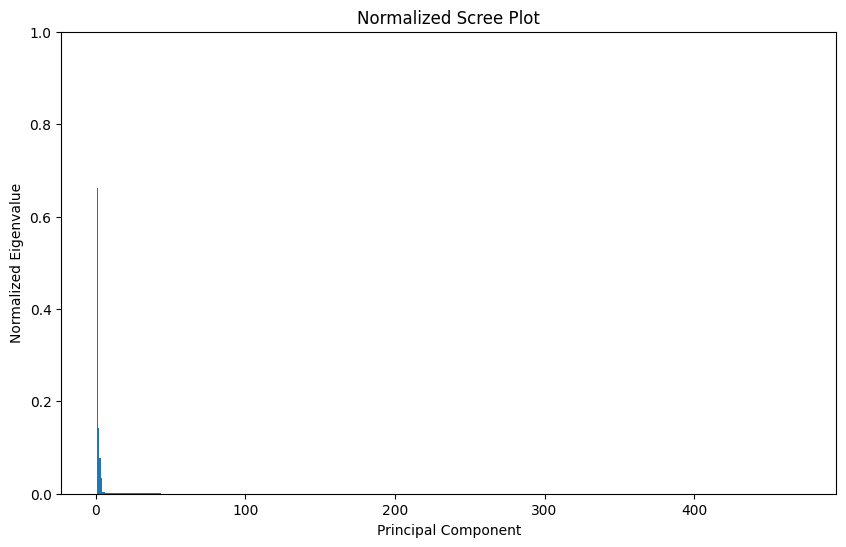

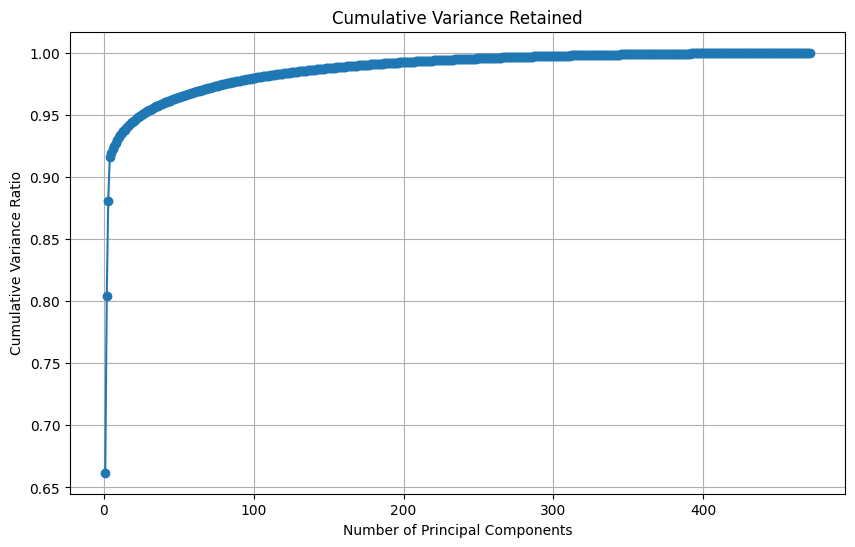

Number of principal components to retain 80% of variance: 2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data
raw_data = pd.read_csv('SP500_close_price_no_missing.csv', index_col=0)
ticker_info = pd.read_csv('SP500_ticker.csv', index_col=0)

# Derive log returns
log_returns = np.log(raw_data / raw_data.shift(1))

# Drop the first row as it will contain NaN values after computing log returns
log_returns = log_returns.dropna()

# Fit PCA model
pca = PCA()
pca.fit(log_returns)

# Scree plot normalized to not exceed 1
eigenvalues = pca.explained_variance_ / np.sum(pca.explained_variance_)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.title('Normalized Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Normalized Eigenvalue')
plt.ylim(0, 1)  # Set y-axis limit to not exceed 1
plt.show()

# Cumulative variance plot
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid(True)
plt.show()

# Determine the number of components to retain 80% of variance
n_components_80_percent = np.argmax(cumulative_variance_ratio >= 0.8) + 1

print(f'Number of principal components to retain 80% of variance: {n_components_80_percent}')


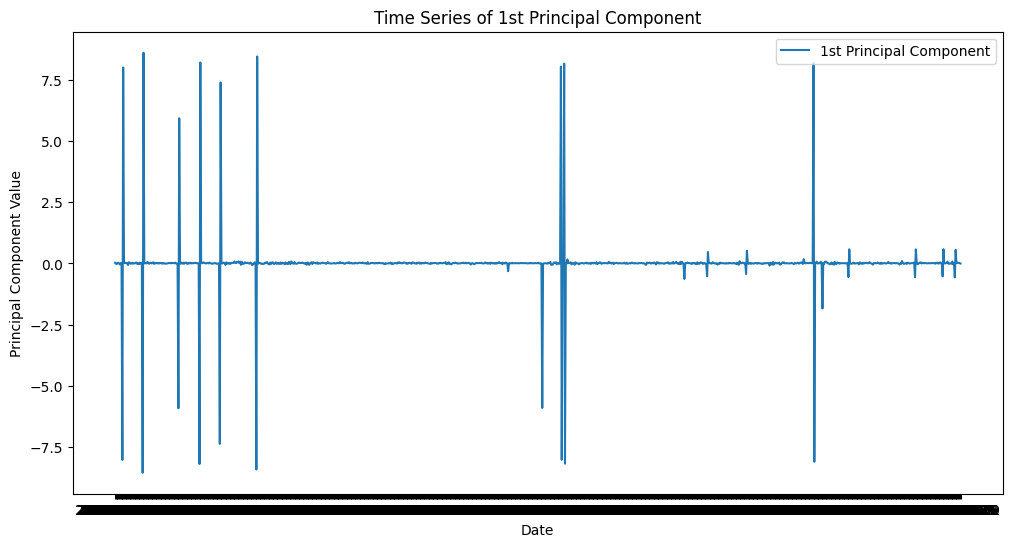

Date with the lowest value for 1st principal component: 2011-02-21


KeyError: "None of ['Ticker'] are in the columns"

In [3]:
# Assuming 'log_returns' is the log returns DataFrame and 'pca' is the fitted PCA model

# Compute and plot the time series of the 1st principal component
pc1_time_series = pca.transform(log_returns)[:, 0]
dates = log_returns.index

plt.figure(figsize=(12, 6))
plt.plot(dates, pc1_time_series, label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()

# Identify the date with the lowest value for the 1st principal component
min_pc1_date = dates[np.argmin(pc1_time_series)]
print(f'Date with the lowest value for 1st principal component: {min_pc1_date}')

# Extract weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0, :]
weights_pc2 = pca.components_[1, :]

# Map ticker symbols to industry sectors
ticker_to_sector = ticker_info.set_index('Ticker')['Sector']

# Create a plot to show weights of the 1st principal component grouped by industry sector
weights_df_pc1 = pd.DataFrame({'Weight': weights_pc1, 'Sector': ticker_to_sector})
mean_weights_pc1_by_sector = weights_df_pc1.groupby('Sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_pc1_by_sector.plot(kind='bar', color='blue')
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

# Create a similar plot for the 2nd principal component
weights_df_pc2 = pd.DataFrame({'Weight': weights_pc2, 'Sector': ticker_to_sector})
mean_weights_pc2_by_sector = weights_df_pc2.groupby('Sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_pc2_by_sector.plot(kind='bar', color='orange')
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

# Analysis and conclusion
# You can analyze the signs and magnitudes of the weights to understand what each principal component captures.
# Based on the analysis, make a decision on which component to use for constructing a new stock index.


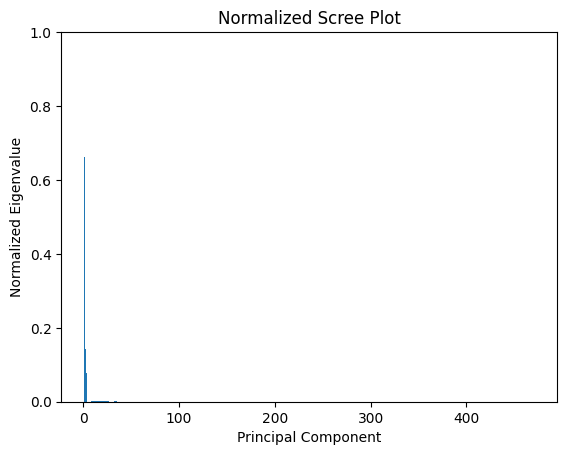

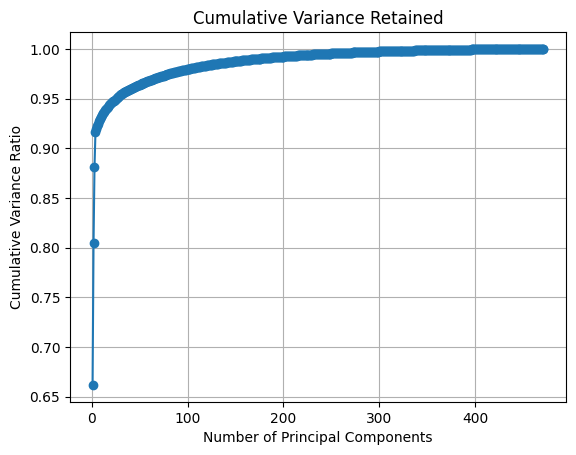

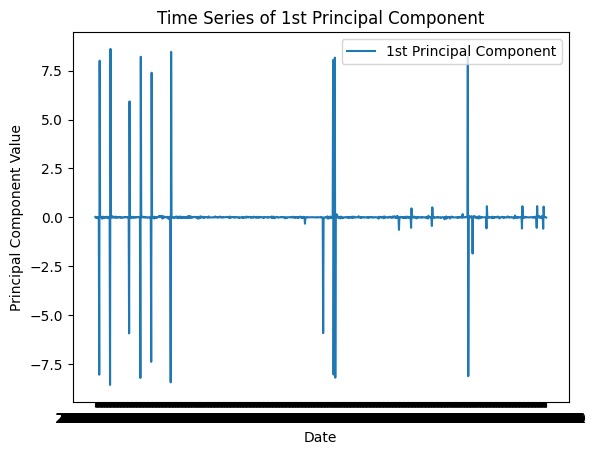

KeyError: "None of ['Ticker'] are in the columns"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have a function get_stock_data(api_key, tickers) to fetch stock data from the API

# Example:
# raw_data = get_stock_data(api_key='your_api_key', tickers=['AAPL', 'GOOGL', ...])

# Example: Compute log returns
log_returns = np.log(raw_data / raw_data.shift(1))
log_returns = log_returns.dropna()

# Example: Fit PCA model
pca = PCA()
pca.fit(log_returns)

# Example: Generate scree plot
eigenvalues = pca.explained_variance_
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues / np.sum(eigenvalues))
plt.title('Normalized Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Normalized Eigenvalue')
plt.ylim(0, 1)
plt.show()

# Example: Generate cumulative variance plot
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid(True)
plt.show()

# Example: Generate time series plot of the 1st principal component
pc1_time_series = pca.transform(log_returns)[:, 0]
dates = log_returns.index

plt.plot(dates, pc1_time_series, label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()

# Example: Extract weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0, :]
weights_pc2 = pca.components_[1, :]

# Map ticker symbols to industry sectors (assuming you have 'Ticker' and 'Sector' columns)
ticker_to_sector = ticker_info.set_index('Ticker')['Sector']

# Example: Generate plot of mean weights of the 1st principal component by industry sector
weights_df_pc1 = pd.DataFrame({'Weight': weights_pc1, 'Sector': ticker_to_sector})
mean_weights_pc1_by_sector = weights_df_pc1.groupby('Sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_pc1_by_sector.plot(kind='bar', color='blue')
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

# Example: Generate plot of mean weights of the 2nd principal component by industry sector
weights_df_pc2 = pd.DataFrame({'Weight': weights_pc2, 'Sector': ticker_to_sector})
mean_weights_pc2_by_sector = weights_df_pc2.groupby('Sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_pc2_by_sector.plot(kind='bar', color='orange')
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()


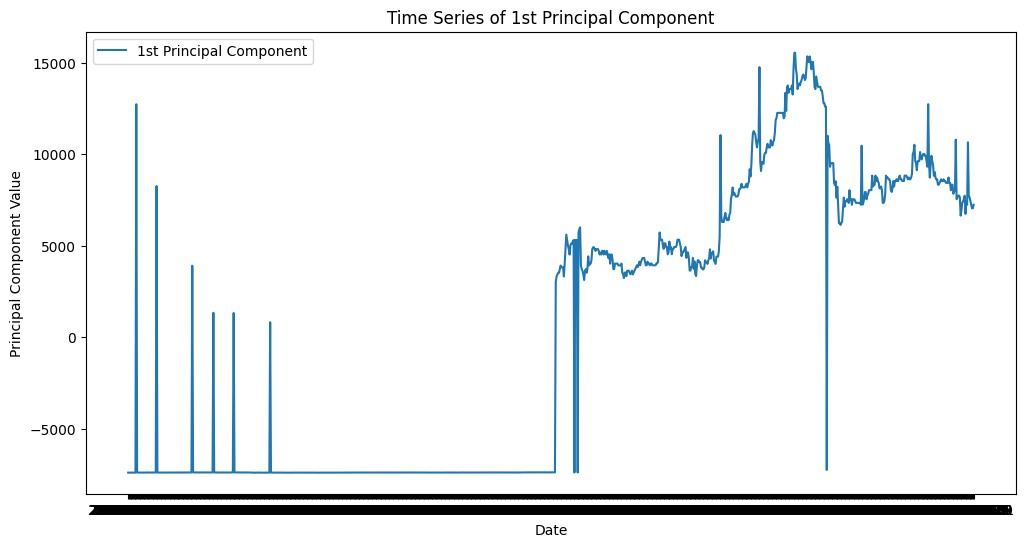

Date with the lowest value for 1st principal component: 2011-10-03


KeyError: 'Ticker'

In [10]:
import pandas as pd

# Load data
close_price_data = pd.read_csv('SP500_close_price_no_missing.csv', index_col=0)
ticker_info = pd.read_csv('SP500_ticker.csv')

from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
pca = PCA()
pca.fit(close_price_data)

# Transform the data
pca_result = pca.transform(close_price_data)

# Extract the 1st principal component
pc1_time_series = pca_result[:, 0]
dates = close_price_data.index

# Plot time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dates, pc1_time_series, label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()

min_pc1_date = dates[np.argmin(pc1_time_series)]
print(f'Date with the lowest value for 1st principal component: {min_pc1_date}')

weights_pc1 = pca.components_[0, :]
weights_pc2 = pca.components_[1, :]

# Merge ticker_info with weights for 1st principal component
weights_df_pc1 = pd.DataFrame({'Weight': weights_pc1, 'Ticker': close_price_data.columns})
merged_df_pc1 = pd.merge(ticker_info, weights_df_pc1, on='Ticker')

# Plot mean weights per sector
mean_weights_pc1_by_sector = merged_df_pc1.groupby('Sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_pc1_by_sector.plot(kind='bar', color='blue')
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

# Merge ticker_info with weights for 2nd principal component
weights_df_pc2 = pd.DataFrame({'Weight': weights_pc2, 'Ticker': close_price_data.columns})
merged_df_pc2 = pd.merge(ticker_info, weights_df_pc2, on='Ticker')

# Plot mean weights per sector
mean_weights_pc2_by_sector = merged_df_pc2.groupby('Sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_pc2_by_sector.plot(kind='bar', color='orange')
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()



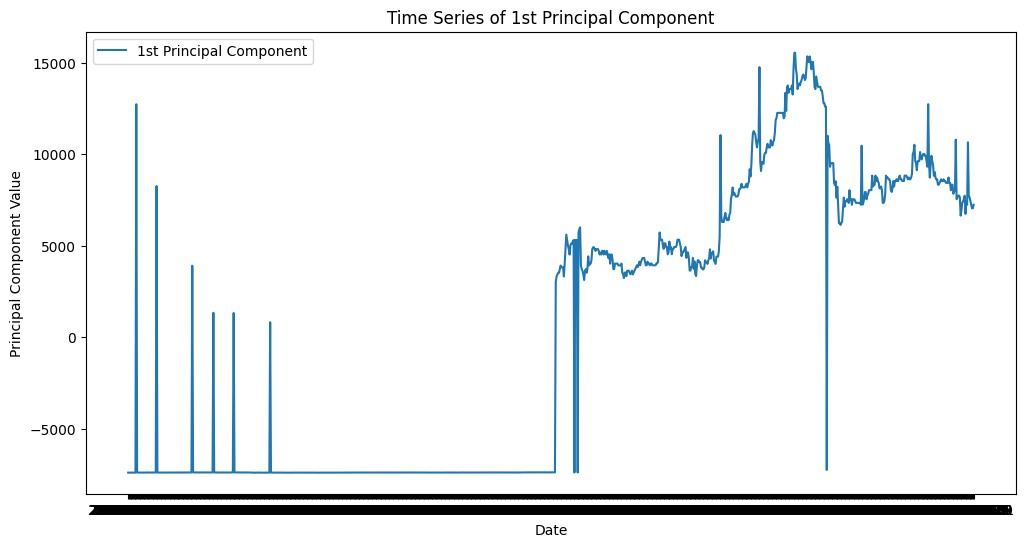

Date with the lowest value for 1st principal component: 2011-10-03


KeyError: 'industry_sector'

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
close_price_data = pd.read_csv('SP500_close_price_no_missing.csv', index_col=0)
ticker_info = pd.read_csv('SP500_ticker.csv')

# Perform PCA
pca = PCA()
pca.fit(close_price_data)

# Extract the 1st principal component
pc1_time_series = pca.transform(close_price_data)[:, 0]
dates = close_price_data.index

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(dates, pc1_time_series, label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()

# Identify date with the lowest value for 1st principal component
min_pc1_date = dates[np.argmin(pc1_time_series)]
print(f'Date with the lowest value for 1st principal component: {min_pc1_date}')

# Extract weights for 1st and 2nd principal components
weights_pc1 = pca.components_[0, :]
weights_pc2 = pca.components_[1, :]
'''
# Merge ticker_info with weights for 1st principal component
weights_df_pc1 = pd.DataFrame({'Weight': weights_pc1, 'Ticker': close_price_data.columns})
merged_df_pc1 = pd.merge(ticker_info, weights_df_pc1, left_on='ticker', right_on='Ticker')

# Plot mean weights per sector for 1st principal component
mean_weights_pc1_by_sector = merged_df_pc1.groupby('industry_sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_pc1_by_sector.plot(kind='bar', color='blue')
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()
'''

# Assuming 'ticker_info' has a column named 'industry_sector'
# If the actual column name is different, please replace it with the correct one

# Merge ticker_info with weights for 1st principal component
weights_df_pc1 = pd.DataFrame({'Weight': weights_pc1, 'Ticker': close_price_data.columns})
merged_df_pc1 = pd.merge(ticker_info, weights_df_pc1, left_on='ticker', right_on='Ticker')

# Plot mean weights per sector for 1st principal component
mean_weights_pc1_by_sector = merged_df_pc1.groupby('industry_sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_pc1_by_sector.plot(kind='bar', color='blue')
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()


# Merge ticker_info with weights for 2nd principal component
weights_df_pc2 = pd.DataFrame({'Weight': weights_pc2, 'Ticker': close_price_data.columns})
merged_df_pc2 = pd.merge(ticker_info, weights_df_pc2, left_on='ticker', right_on='Ticker')

# Plot mean weights per sector for 2nd principal component
mean_weights_pc2_by_sector = merged_df_pc2.groupby('industry_sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_pc2_by_sector.plot(kind='bar', color='orange')
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()


In [16]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.8 MB/s eta 0:00:0000:0100:01
  Created wheel for peewee: filename=peewee-3.17.0-cp39-cp39-macosx_10_9_universal2.whl size=386956 sha256=bfe62b1aeb09b1ea1c97c87db4f256529c7ef73925f22d0e2c8b3e3f29765843
  Stored in directory: /Users/serenamcdonald/Library/Caches/pip/wheels/77/6b/dc/722aee2a5d46a021ab67564c9d3d5536c3bd9577fcdc3a5aeb
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


Backward Stepwise Regression Selected Features: Index(['Wrist'], dtype='object')
Forward Stepwise Regression Selected Features: Index(['Wrist'], dtype='object')

Feature Ranking based on Correlation:
fatpctg    1.000000
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
Name: fatpctg, dtype: float64


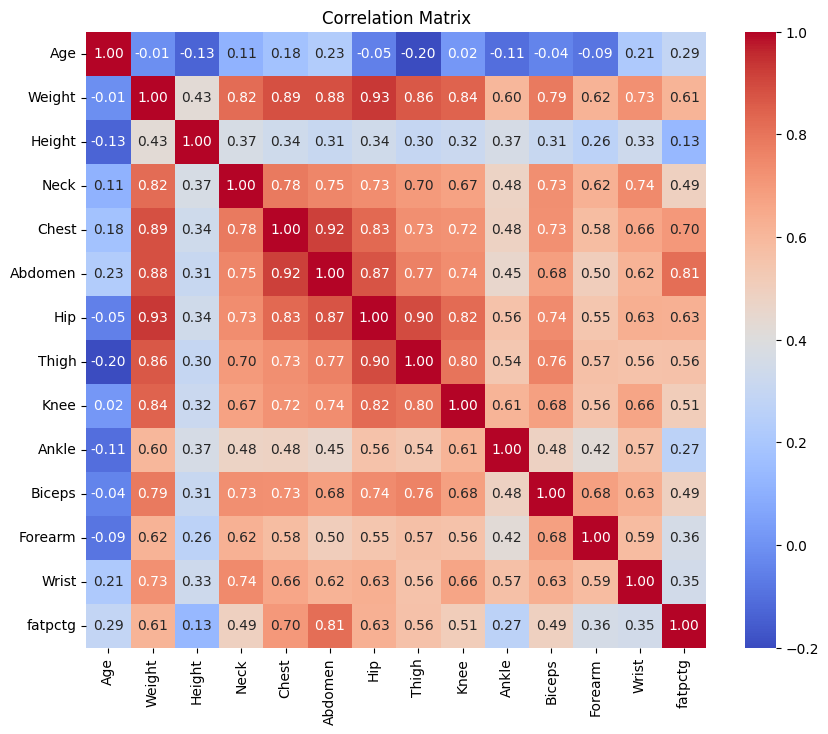


Lasso Regression Selected Features: Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

Feature Importance Ranking using Random Forest:
Abdomen    0.714957
Weight     0.031164
Wrist      0.030504
Height     0.029040
Hip        0.028463
Neck       0.026902
Chest      0.024049
Age        0.023840
Ankle      0.019951
Biceps     0.019619
Knee       0.019410
Forearm    0.016606
Thigh      0.015493
dtype: float64


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('BMI.csv')

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['fatpctg'])
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a) Wrapper method: Backward and Forward Stepwise Regression

# Backward Stepwise Regression
estimator = LinearRegression()
backward_selector = RFE(estimator, n_features_to_select=1, step=1, verbose=0)
backward_selector = backward_selector.fit(X_train, y_train)
backward_selected_features = X.columns[backward_selector.support_]

# Forward Stepwise Regression
estimator = LinearRegression()
forward_selector = RFE(estimator, n_features_to_select=1, step=1, verbose=0)
forward_selector = forward_selector.fit(X_train, y_train)
forward_selected_features = X.columns[forward_selector.support_]

print("Backward Stepwise Regression Selected Features:", backward_selected_features)
print("Forward Stepwise Regression Selected Features:", forward_selected_features)

# b) Filter method: Feature Ranking using Correlation

correlation_matrix = data.corr()
feature_ranking = correlation_matrix['fatpctg'].abs().sort_values(ascending=False)
print("\nFeature Ranking based on Correlation:")
print(feature_ranking)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# c) Embedded method: Lasso Regression

lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)
lasso_selected_features = X.columns[lasso_model.coef_ != 0]

print("\nLasso Regression Selected Features:", lasso_selected_features)

# Embedded method: Random Forest Feature Importance Ranking
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Ranking using Random Forest:")
print(feature_importance)
